<img src="../img/iris.jpg"  width="450" height="200">

### Understanding Mutliclass Classificaion ML Models with SHAP

The iris dataset is famous in the data science community; you can learn more [here](https://archive.ics.uci.edu/ml/datasets/iris). What we need to know is that the dataset is made up of 150 rows/ instances. Each row has four attribue features relating to different dimensions (width and length of sepal and petals) and there are three species (classes) to consider: Setosa, Versicolour, Virginica. These are the targets and there are 50 observations for each species - therefore we can say the data is balanced.

In this exercise you will need go through the code and fill in any missing spaces (denoted with `XXXX`). There will be clues and hints.

By the end of this exercise you should understand how to use the SHAP library to understand a RandomForestClassifier model.

#### Library Imports

There are THREE missing values in the section below

In [1]:
from sklearn import datasets
import pandas as pd ####
import numpy as np ####
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import shap
from shap import Explanation

# Java Script for SHAP Plots
shap.initjs() ####

In [2]:
# Helper function to see methods in object
# Might be useful when working through this exercise

def object_methods(obj):
    '''
    Helper function to list methods associated with an object
    '''
    try:
        methods = [method_name for method_name in dir(obj)
                   if callable(getattr(obj, method_name))]
        print('Below are the methods for object: ', obj)
        for method in methods:
            print(method)
    except:
        print("Error")

#### Load & Clean Data

There is ONE missing value in the section below.
HINT: The assign the dataframe to the same variable (name) as the data was initially imported to.

In [3]:
# Loading and cleaning the data
iris = datasets.load_iris()

# made into dataframe
iris = pd.DataFrame( ####
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

# Convert target float to int
iris['target'] = iris['target'].apply(lambda x: int(x))

In [4]:
# Define the different classes/ species
class_dict = {0 : 'setosa',
             1 : 'versicolor',
             2 : 'virginica'}

class_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [5]:
# Add species into the dataframe
iris['species'] = iris['target'].apply(lambda x: class_dict.get(x))

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# Take a look at some stats about the data
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Plot the Data

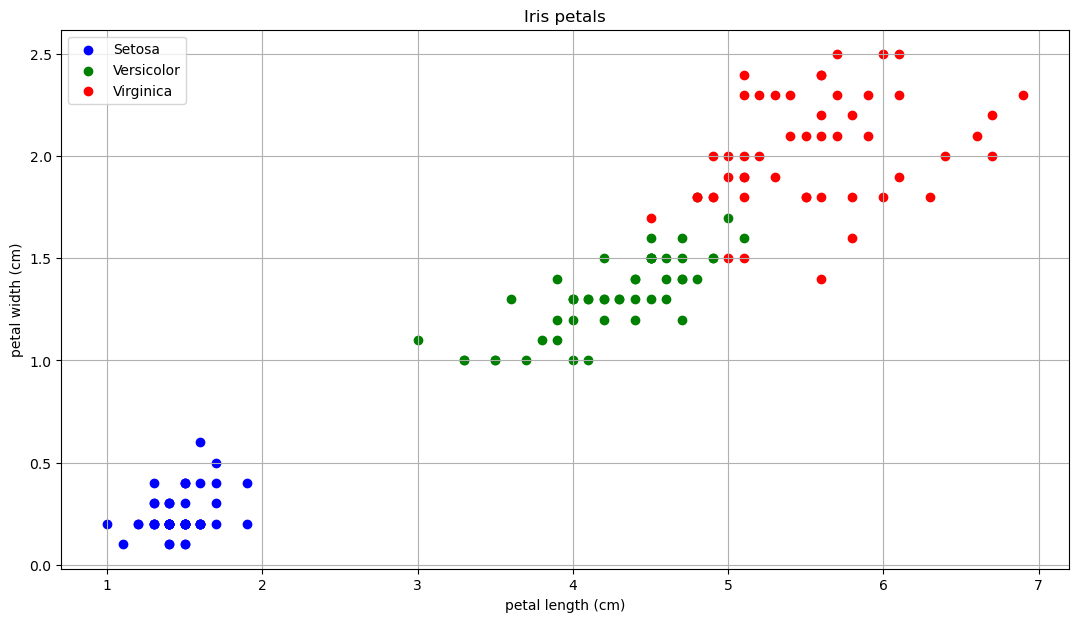

In [7]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

#### Performing Classification

There is ONE missing value in the section below

In [8]:
# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# Define features (X) and target (y)
X = X
y = iris['target']

# get class and features names
class_names = iris.species.unique()
feature_names = X.columns

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, ####
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

There is ONE missing value in the section below

In [24]:
# Instantiate a RFC model and fit it
model = RandomForestClassifier(n_estimators=100,
                               n_jobs=-1,
                               class_weight='balanced',
                               random_state=42)

model.fit(X_train, ####
          y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

#### Inspecting Model's 'Feature Importance' ('Out of the box')

In [25]:
# Looking at standard feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

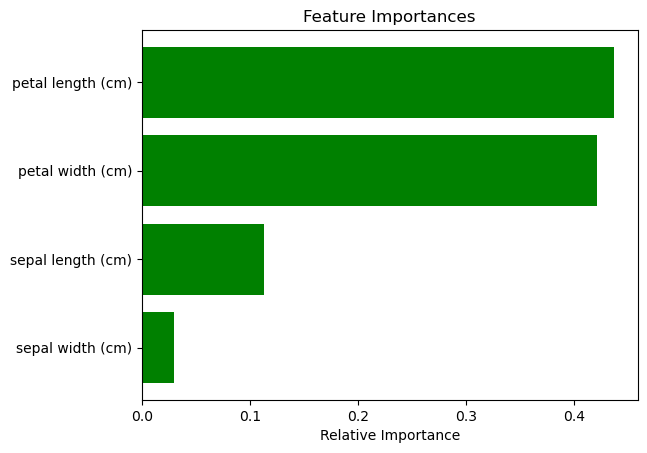

In [26]:
# Generate Feature Bar Chart of Standard Feature Importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Predictions

There is ONE missing value in the section below

In [12]:
# Training predictions
training_prediction = model.predict(X_train) ####
training_prediction

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

There is ONE missing value in the section below

In [13]:
# Test predictions
test_prediction = model.predict(X_test) ####
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Assessing Performance

In [14]:
# Performance with training data
print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train,
                                    training_prediction,
                                    digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train,
                               training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        40
           1      1.000     1.000     1.000        41
           2      1.000     1.000     1.000        39

    accuracy                          1.000       120
   macro avg      1.000     1.000     1.000       120
weighted avg      1.000     1.000     1.000       120

[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


In [15]:
# Performance with testing data
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test,
                                    test_prediction,
                                    digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test,
                               test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000        11

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#### Obtaining Shap Values

There is ONE missing value in the section below.

HINT Why not use the ``function to see if you can identify which method will return Shapley Values

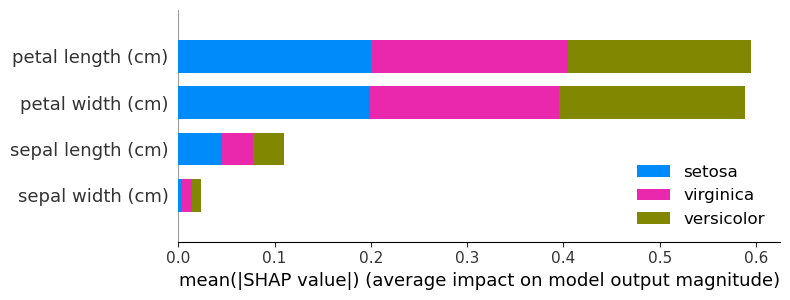

In [27]:
# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test) ####

shap.summary_plot(shap_values,
                  X_test.values,
                  plot_type="bar",
                  class_names= class_names,
                  feature_names = feature_names)

#### Summary Plots for each Class

There is ONE missing value in the code below

HINT You had to look up the method to create this variable above

---------

Summary Plot for Class Setosa


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


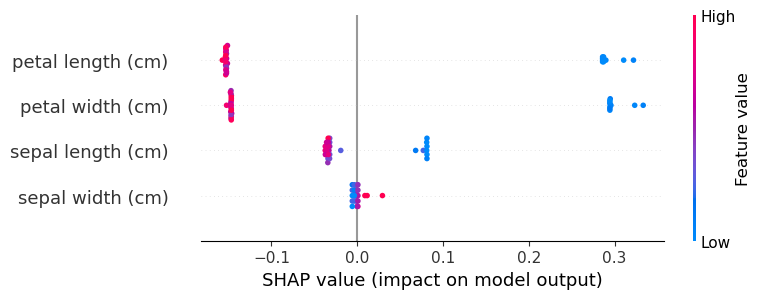

---------

Summary Plot for Class Versicolor


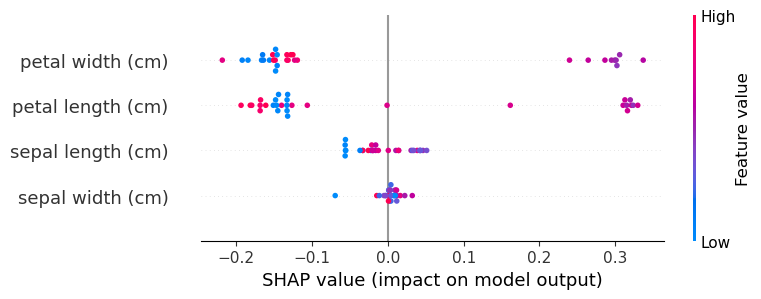

---------

Summary Plot for Class Virginica


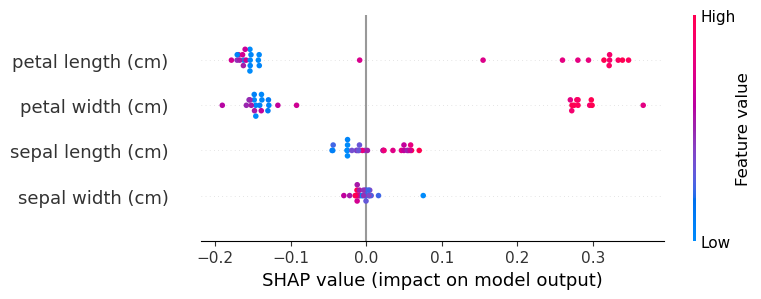

In [29]:
# Summary Plot for Each Class

for class_id in iris.target.unique():
    class_name = class_dict.get(class_id).capitalize()
    print(f"---------\n\nSummary Plot for Class {class_name}")
    shap.summary_plot(shap_values[class_id], ####
                      X_test.values,
                      feature_names = feature_names)

#### Dependence Plots for each Class (Species)

There is ONE missing value in the code below.

--------

Dependence Plot for Setosa - sepal length (cm)


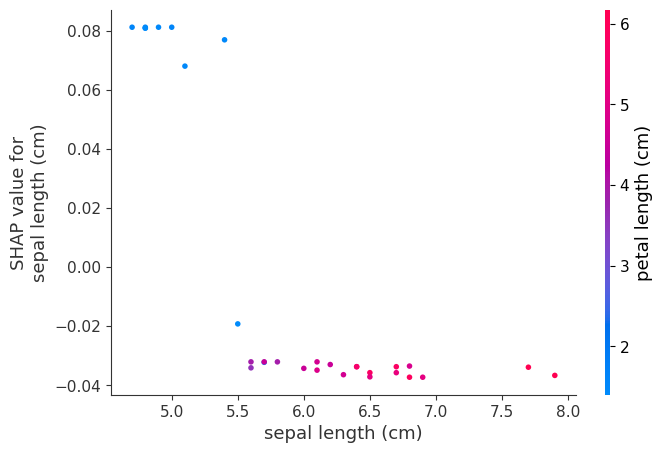

--------

Dependence Plot for Setosa - sepal width (cm)


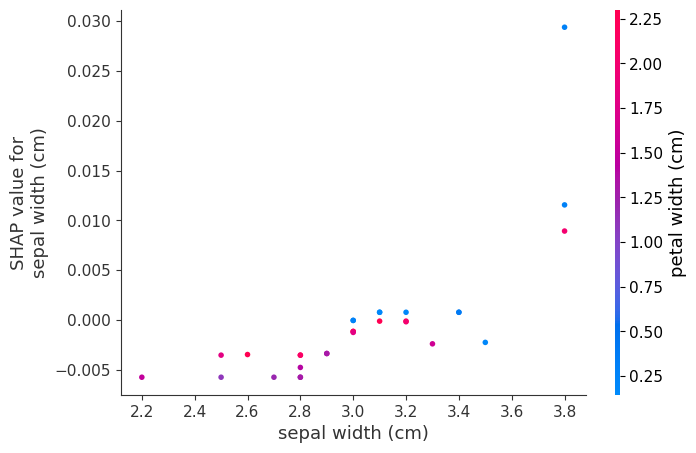

--------

Dependence Plot for Setosa - petal length (cm)


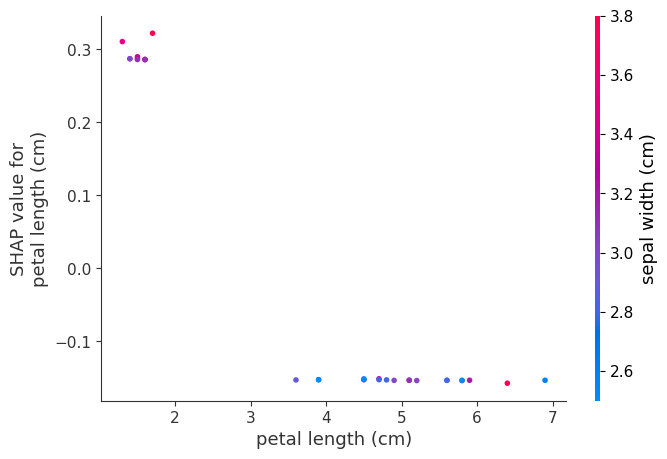

--------

Dependence Plot for Setosa - petal width (cm)


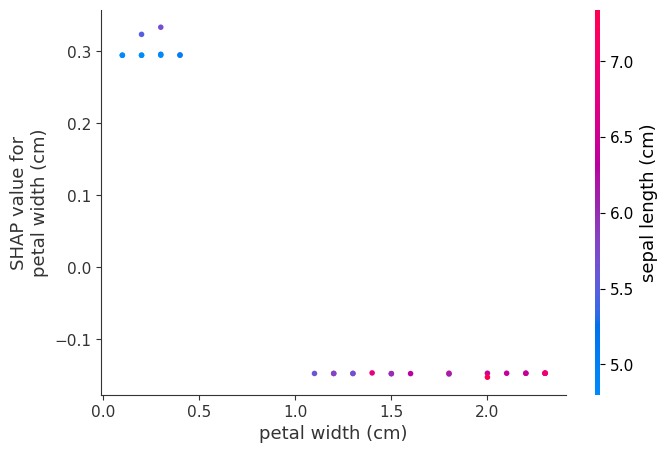

--------

Dependence Plot for Versicolor - sepal length (cm)


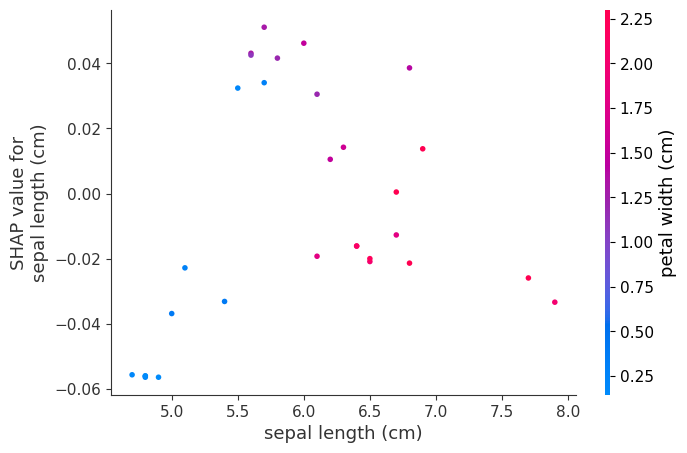

--------

Dependence Plot for Versicolor - sepal width (cm)


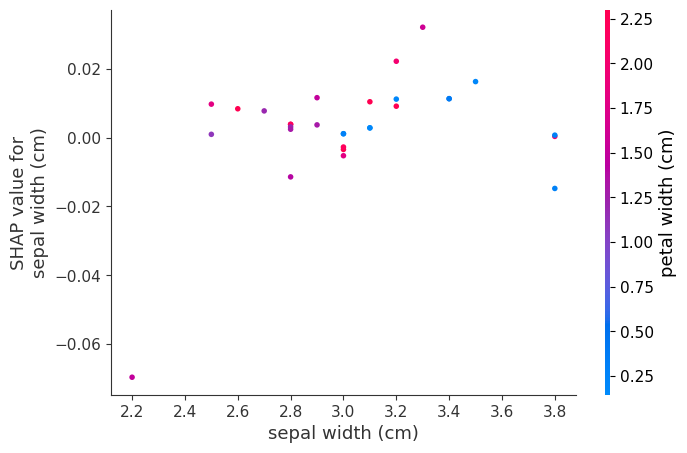

--------

Dependence Plot for Versicolor - petal length (cm)


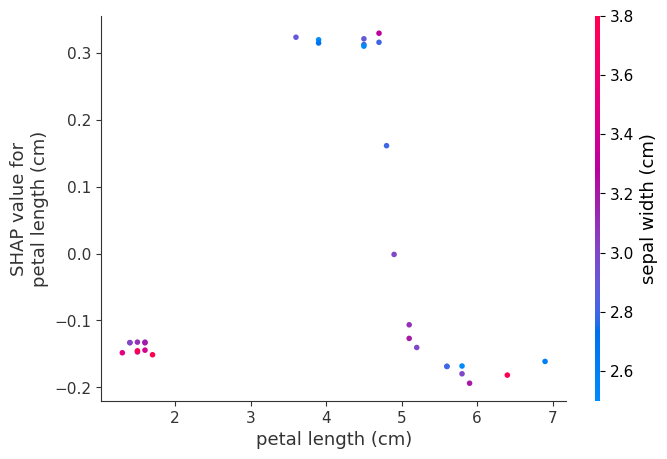

--------

Dependence Plot for Versicolor - petal width (cm)


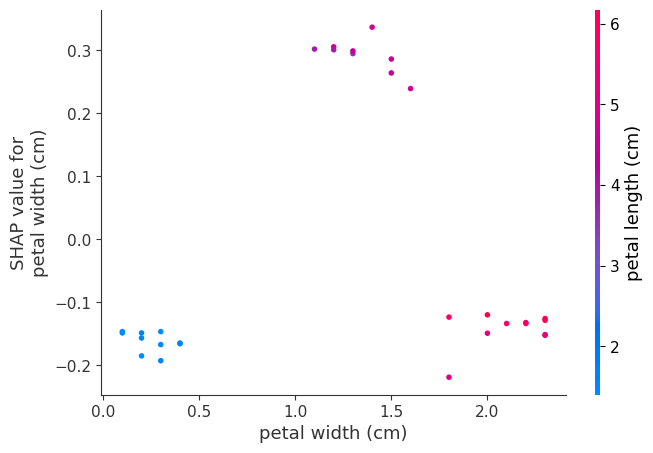

--------

Dependence Plot for Virginica - sepal length (cm)


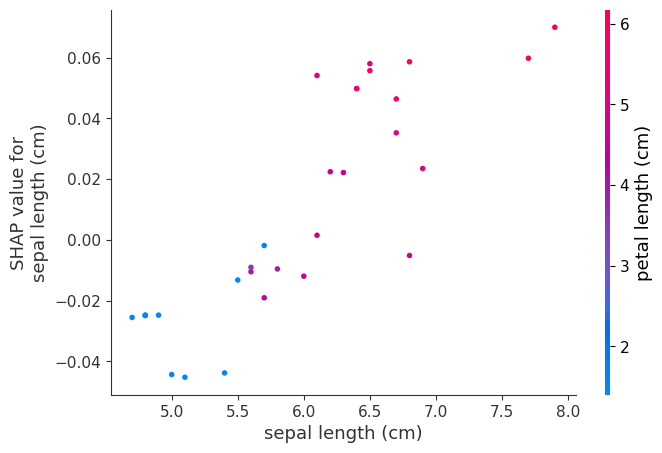

--------

Dependence Plot for Virginica - sepal width (cm)


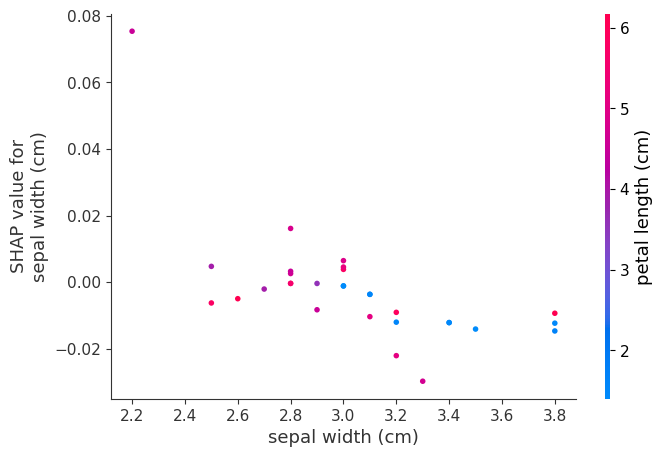

--------

Dependence Plot for Virginica - petal length (cm)


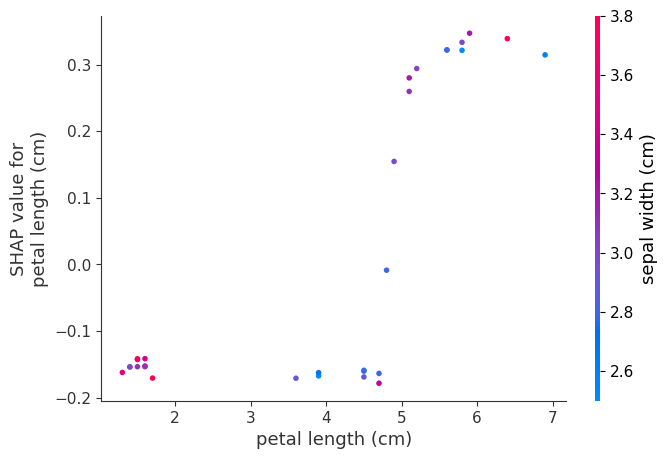

--------

Dependence Plot for Virginica - petal width (cm)


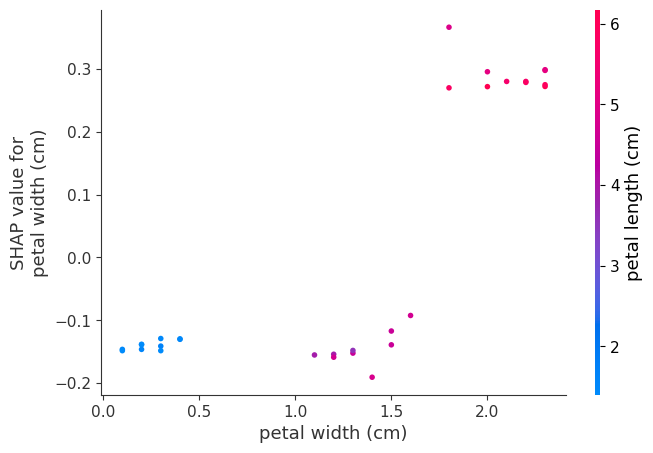

In [18]:
# dependence plots

for class_id in iris.target.unique():
    for idx, col_name in enumerate(feature_names):
            class_name = class_dict.get(class_id).capitalize()
            print(f"--------\n\nDependence Plot for {class_name} - {col_name}")
            shap.dependence_plot(idx, # Index of Column ####
                                 shap_values[class_id], # Shap values for class of interest
                                 X_test.values, # Array of data
                                 feature_names=feature_names) # Feature Names

#### Force & Water  Plots

You can change the `row` and `class_id` values below to see the different outputs

In [22]:
# Force Plot
row = 2
class_id = 0

class_name = class_dict.get(class_id).capitalize()

print(f"Below is the Force Plot for {class_name} - Record {row}")
print("i.e. This represents how the probabilty of this class being chosen was made")
shap.force_plot(explainer.expected_value[class_id], # return the base or expected values from the `explainer` object
                shap_values[class_id][row], # return the shap values for the respective class and row number
                X_test.iloc[row].values, # values under the bar
                feature_names = feature_names)


Below is the Force Plot for Setosa - Record 2
i.e. This represents how the probabilty of this class being chosen was made


In [ ]:
There is ONE missing value in the code below

HINT the `data` arguement will come from a single row of data from the testing data.

Below is the Waterfall Plot for Setosa - Record 2
i.e. This represents how the probabilty of this class being chosen was made


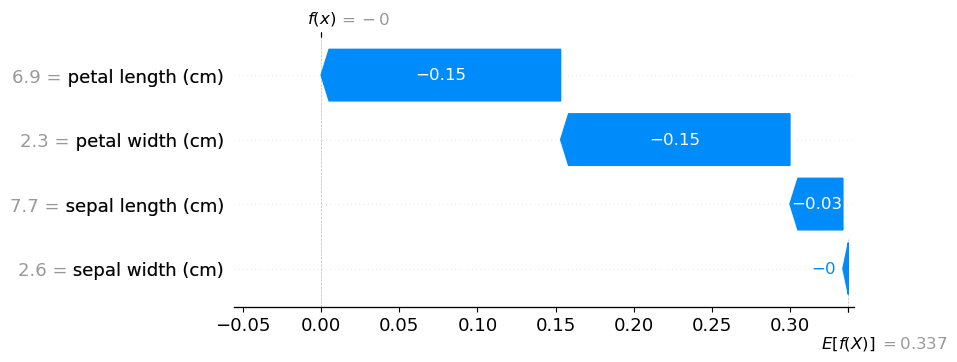

In [23]:
# Waterfall Plot
print(f"Below is the Waterfall Plot for {class_name} - Record {row}")
print("i.e. This represents how the probabilty of this class being chosen was made")
shap.waterfall_plot(shap.Explanation(values = shap_values[class_id][row], # return the shap values for the respective class and row number
                                     base_values = explainer.expected_value[class_id], # return the base or expected values from the `explainer` object
                                     data = X_test.iloc[row], # feature values (light grey on left hand side) ####
                                     feature_names = feature_names))